In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from adjustText import adjust_text

In [10]:
df = pd.read_csv("../datasets/Iris.csv")
df = df.drop("Id", axis=1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [11]:
def extended_describe_numeric(df):
    numeric_df = df.select_dtypes(include=["number"])
    
    desc = numeric_df.describe().T
    desc["median"] = numeric_df.median()
    desc["range"] = desc["max"] - desc["min"]
    desc["IQR"] = desc["75%"] - desc["25%"]
    desc["lower_bound"] = desc["25%"] - 1.5 * desc["IQR"]
    desc["upper_bound"] = desc["75%"] + 1.5 * desc["IQR"]
    
    return desc

extended_stats = extended_describe_numeric(df)
extended_stats

,count,mean,std,min,25%,50%,75%,max,median,range,IQR,lower_bound,upper_bound
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9,5.80,3.6,1.3,3.15,8.35
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4,3.00,2.4,0.5,2.05,4.05
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9,4.35,5.9,3.5,-3.65,10.35
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5,1.30,2.4,1.5,-1.95,4.05


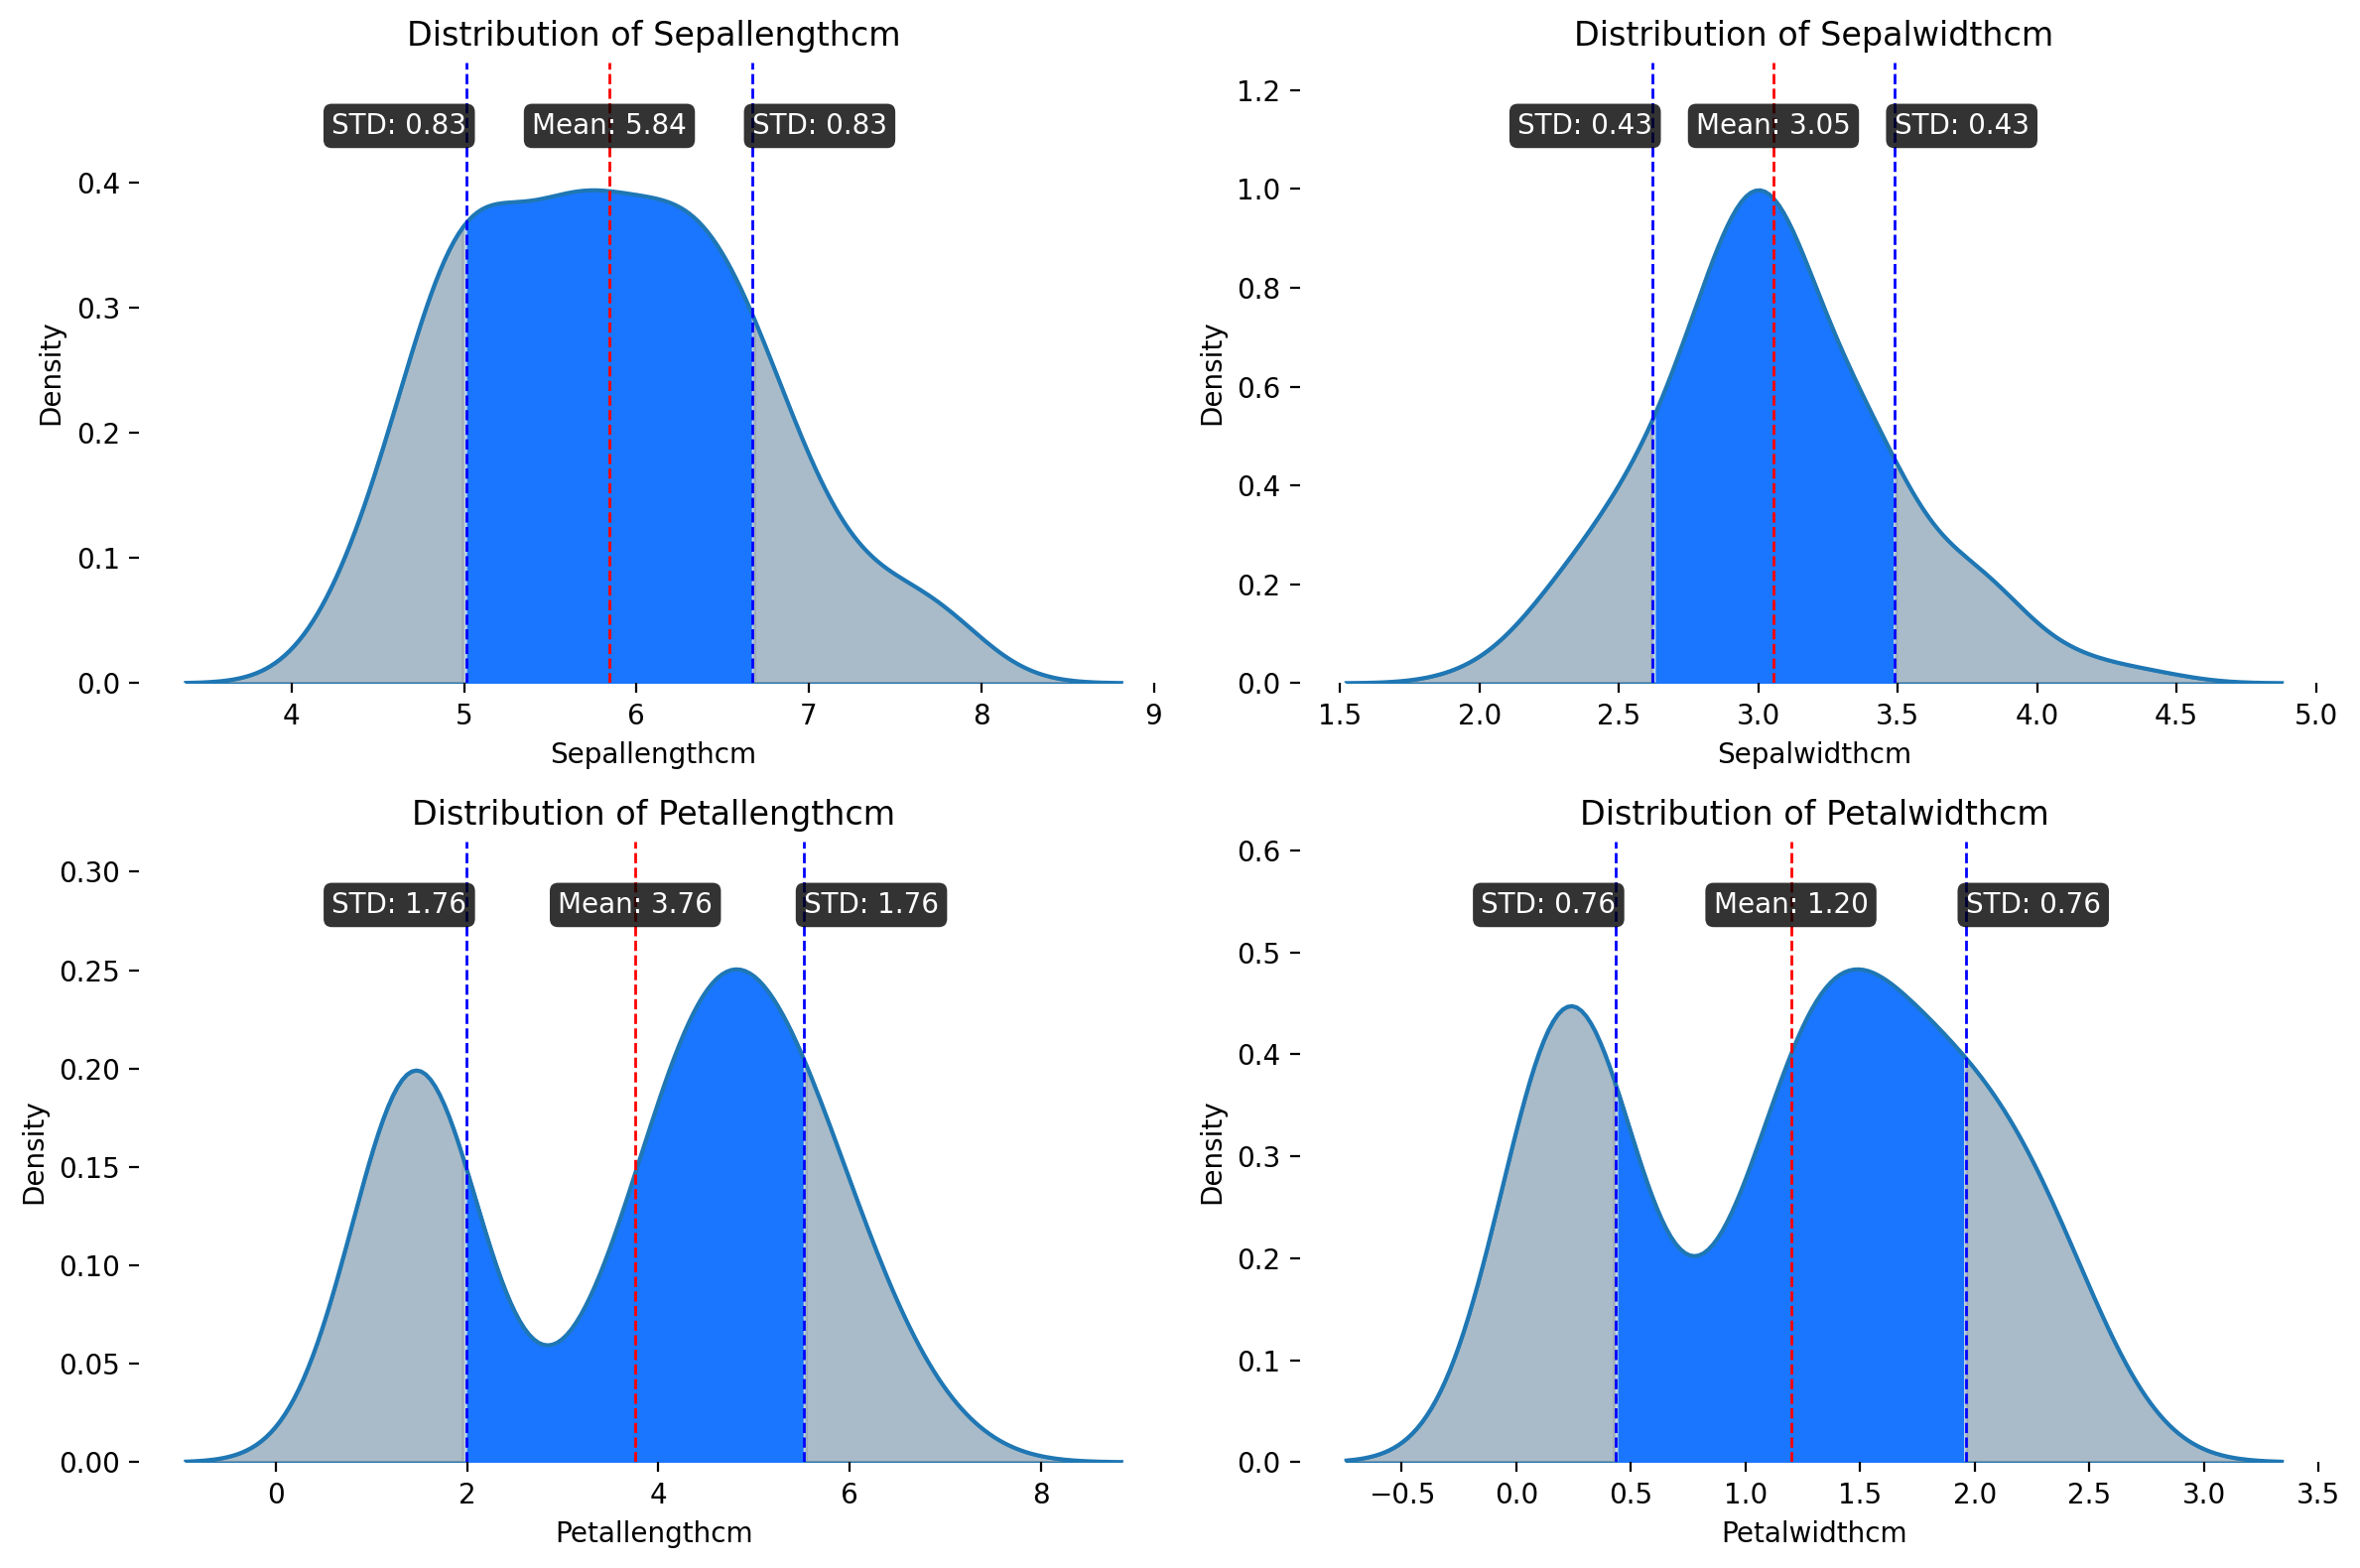

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8), dpi=200)
columns = df.columns[:-1]

for i, ax in enumerate(axes.flatten()):
    col = columns[i]
    mean_val = df[col].mean()
    std_val = df[col].std()

    sns.kdeplot(df[col], ax=ax, fill=True, alpha=0.3)
    
    kde = sns.kdeplot(df[col], ax=ax).get_lines()[0].get_data()
    ax.fill_between(kde[0], kde[1], where=(kde[0] > (mean_val - std_val)) & (kde[0] < (mean_val + std_val)), 
                    color="#1a76ff", alpha=1)
    ax.fill_between(kde[0], kde[1], where=(kde[0] <= (mean_val - std_val)) | (kde[0] >= (mean_val + std_val)), 
                    color="grey", alpha=0.3)
    
    ax.axvline(mean_val, color="red", linestyle="--", linewidth=1)
    ax.axvline(mean_val + std_val, color="blue", linestyle="--", linewidth=1)
    ax.axvline(mean_val - std_val, color="blue", linestyle="--", linewidth=1)

    bbox_props = dict(boxstyle="round,pad=0.3", edgecolor="none", facecolor="black", alpha=0.8)
    ax.text(mean_val, ax.get_ylim()[1] * 1.05, f"Mean: {mean_val:.2f}", color="white", ha="center", va="bottom", bbox=bbox_props)
    ax.text(mean_val + std_val, ax.get_ylim()[1] * 1.05, f"STD: {std_val:.2f}", color="white", ha="left", va="bottom", bbox=bbox_props)
    ax.text(mean_val - std_val, ax.get_ylim()[1] * 1.05, f"STD: {std_val:.2f}", color="white", ha="right", va="bottom", bbox=bbox_props)

    ax.set_ylim(0, ax.get_ylim()[1] * 1.2)

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)

    ax.set_title(f"Distribution of {col.capitalize()}")
    ax.set_xlabel(col.capitalize())
    ax.set_ylabel("Density")

plt.tight_layout()
plt.show()

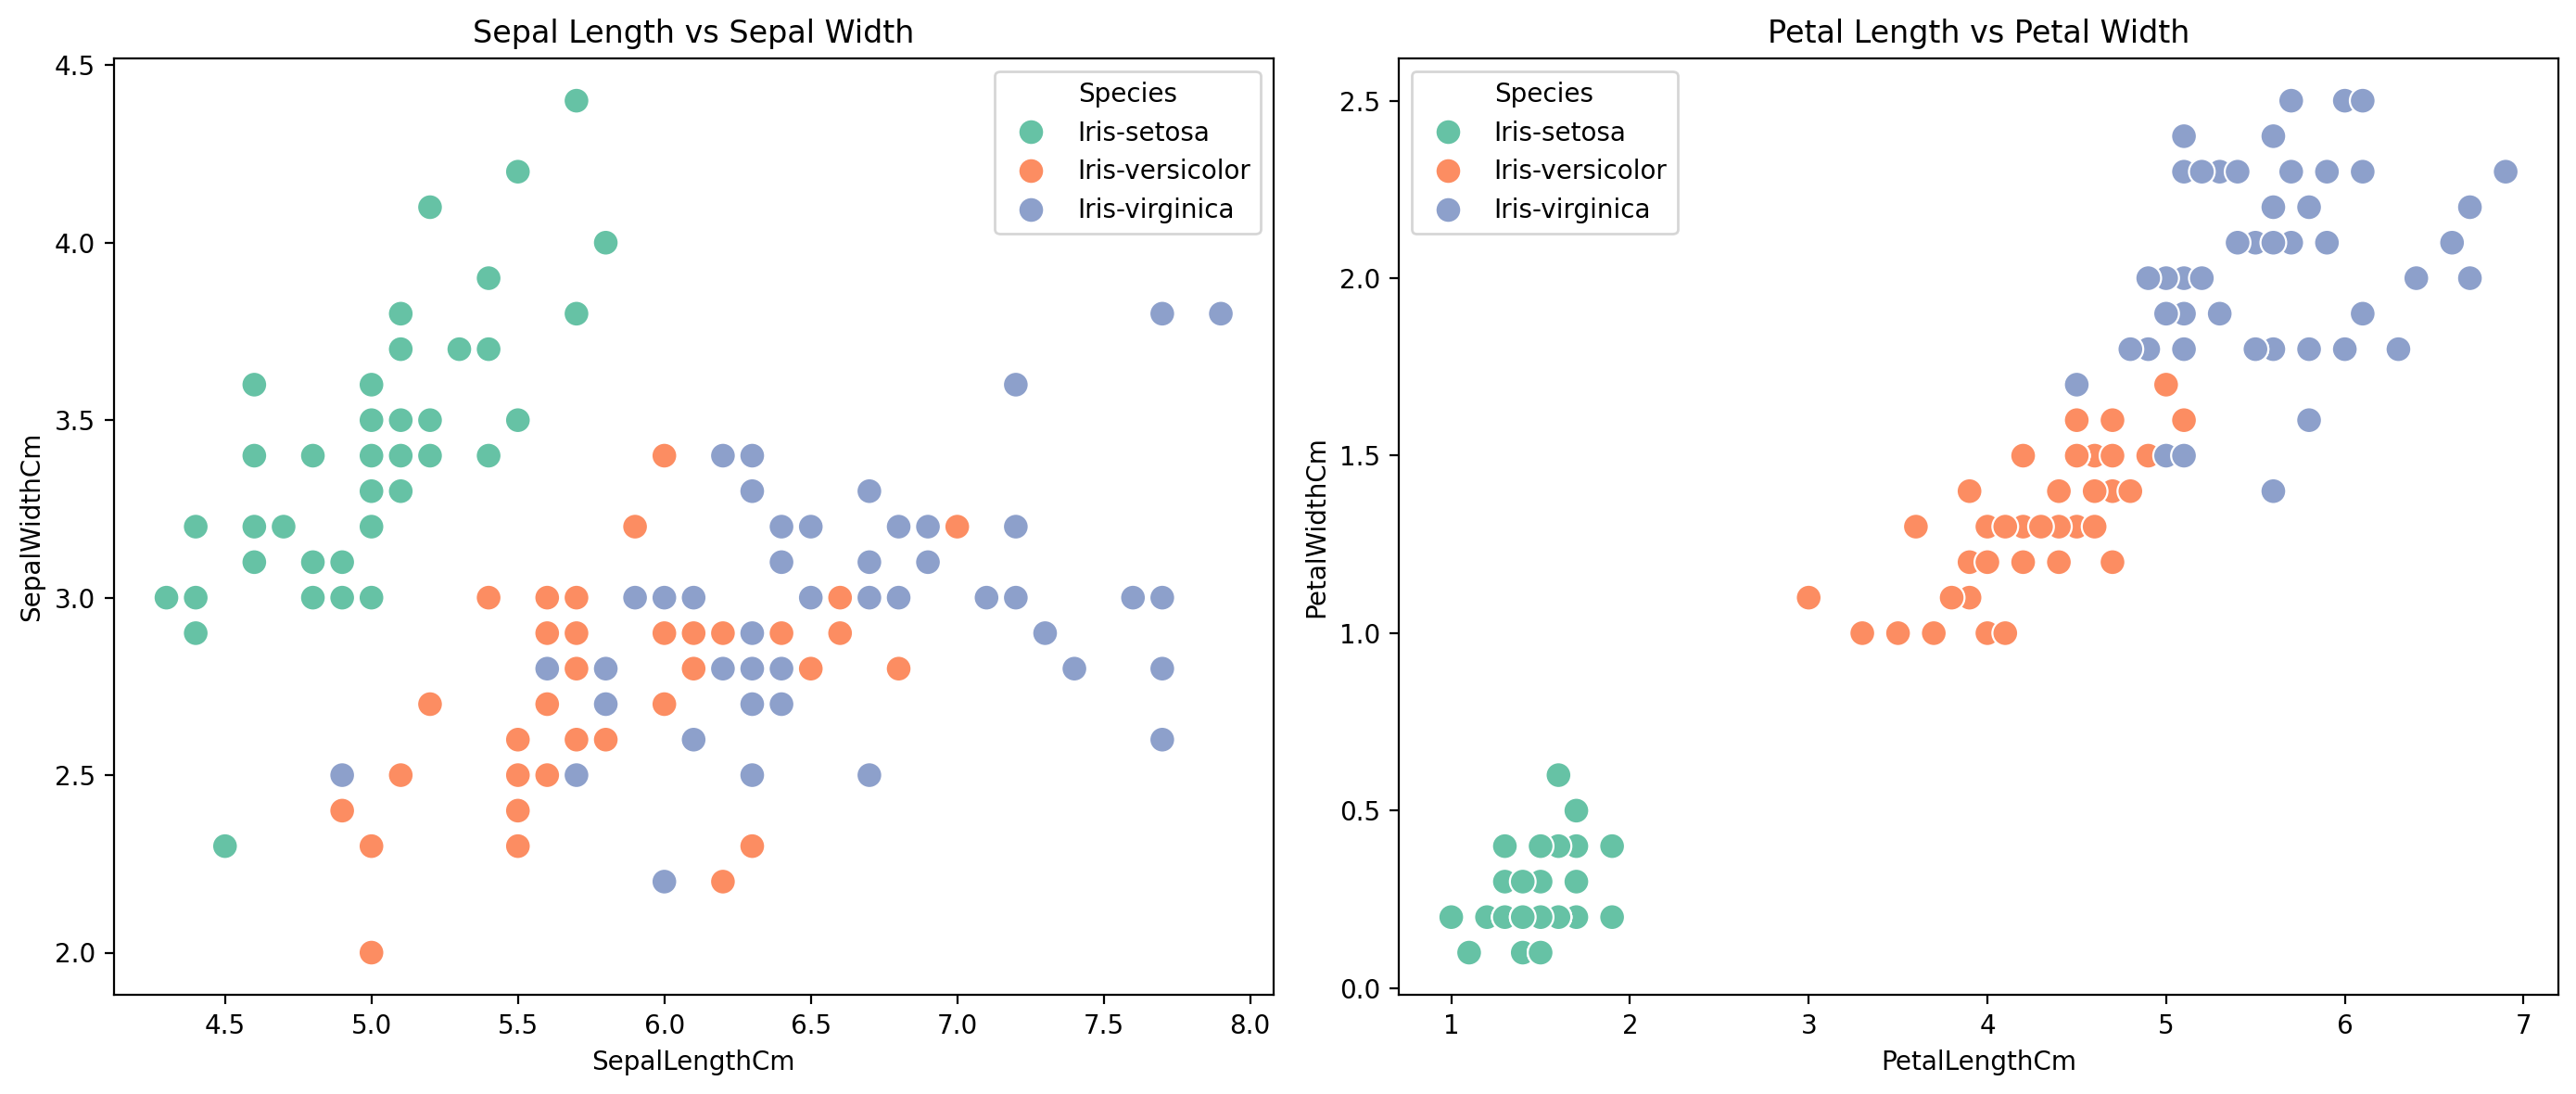

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6), dpi=200)

plots = [
    {"x": "SepalLengthCm", "y": "SepalWidthCm", "title": "Sepal Length vs Sepal Width"},
    {"x": "PetalLengthCm", "y": "PetalWidthCm", "title": "Petal Length vs Petal Width"}
]

for ax, plot in zip(axs, plots):
    sns.scatterplot(data=df, x=plot["x"], y=plot["y"], hue="Species", palette=sns.color_palette("Set2", n_colors=3), ax=ax, s=100)
    ax.set_title(plot["title"])

plt.tight_layout()
plt.show()

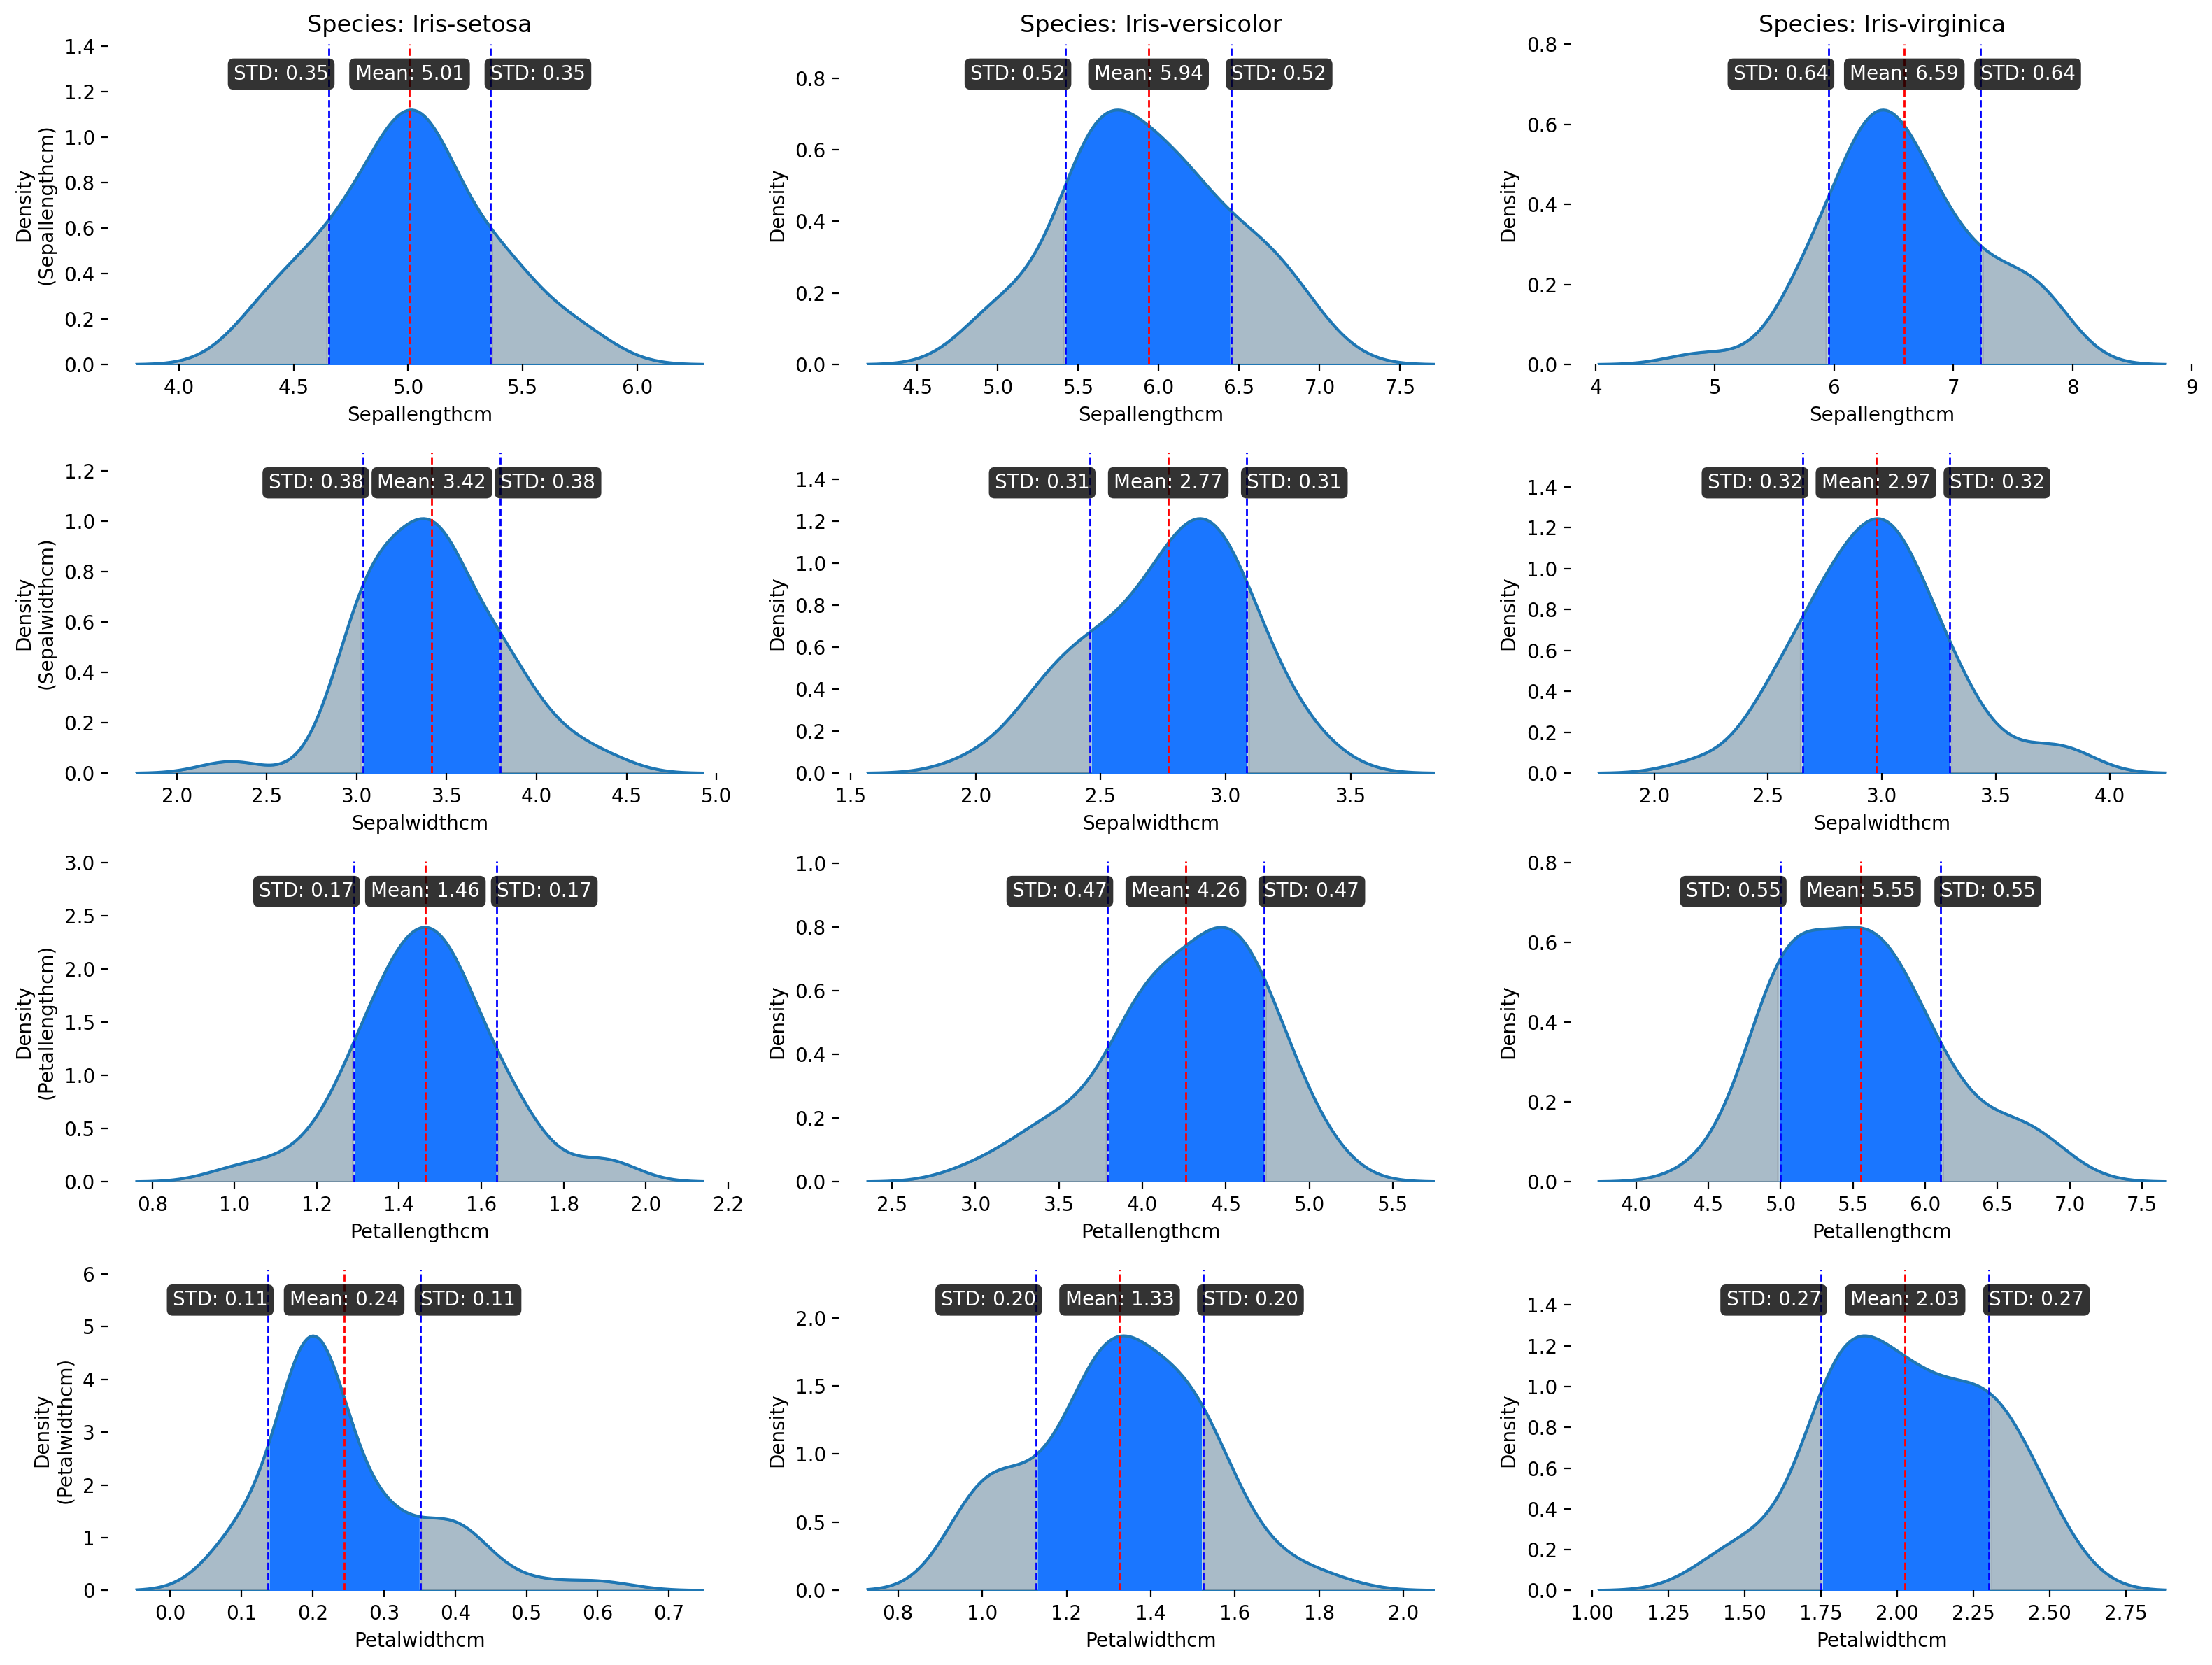

In [14]:
species_list = df["Species"].unique()

fig, axes = plt.subplots(len(df.columns) - 1, len(species_list), figsize=(16, 12), dpi=200)
columns = df.columns[:-1]

for i, col in enumerate(columns):
    for j, species in enumerate(species_list):
        ax = axes[i, j]
        subset = df[df["Species"] == species][col]
        mean_val = subset.mean()
        std_val = subset.std()

        sns.kdeplot(subset, ax=ax, fill=True, alpha=0.3)
        kde = sns.kdeplot(subset, ax=ax).get_lines()[0].get_data()

        ax.fill_between(kde[0], kde[1], where=(kde[0] > (mean_val - std_val)) & (kde[0] < (mean_val + std_val)), 
                        color="#1a76ff", alpha=1)
        ax.fill_between(kde[0], kde[1], where=(kde[0] <= (mean_val - std_val)) | (kde[0] >= (mean_val + std_val)), 
                        color="grey", alpha=0.3)

        ax.axvline(mean_val, color="red", linestyle="--", linewidth=1)
        ax.axvline(mean_val + std_val, color="blue", linestyle="--", linewidth=1)
        ax.axvline(mean_val - std_val, color="blue", linestyle="--", linewidth=1)

        bbox_props = dict(boxstyle="round,pad=0.3", edgecolor="none", facecolor="black", alpha=0.8)
        ax.text(mean_val, ax.get_ylim()[1] * 1.05, f"Mean: {mean_val:.2f}", color="white", ha="center", va="bottom", bbox=bbox_props)
        ax.text(mean_val + std_val, ax.get_ylim()[1] * 1.05, f"STD: {std_val:.2f}", color="white", ha="left", va="bottom", bbox=bbox_props)
        ax.text(mean_val - std_val, ax.get_ylim()[1] * 1.05, f"STD: {std_val:.2f}", color="white", ha="right", va="bottom", bbox=bbox_props)

        ax.set_ylim(0, ax.get_ylim()[1] * 1.2)

        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_visible(False)
        ax.spines["bottom"].set_visible(False)

        if j == 0:
            ax.set_ylabel(f"Density\n({col.capitalize()})")
        if i == 0:
            ax.set_title(f"Species: {species.capitalize()}")
        ax.set_xlabel(col.capitalize())

plt.tight_layout()
plt.show()

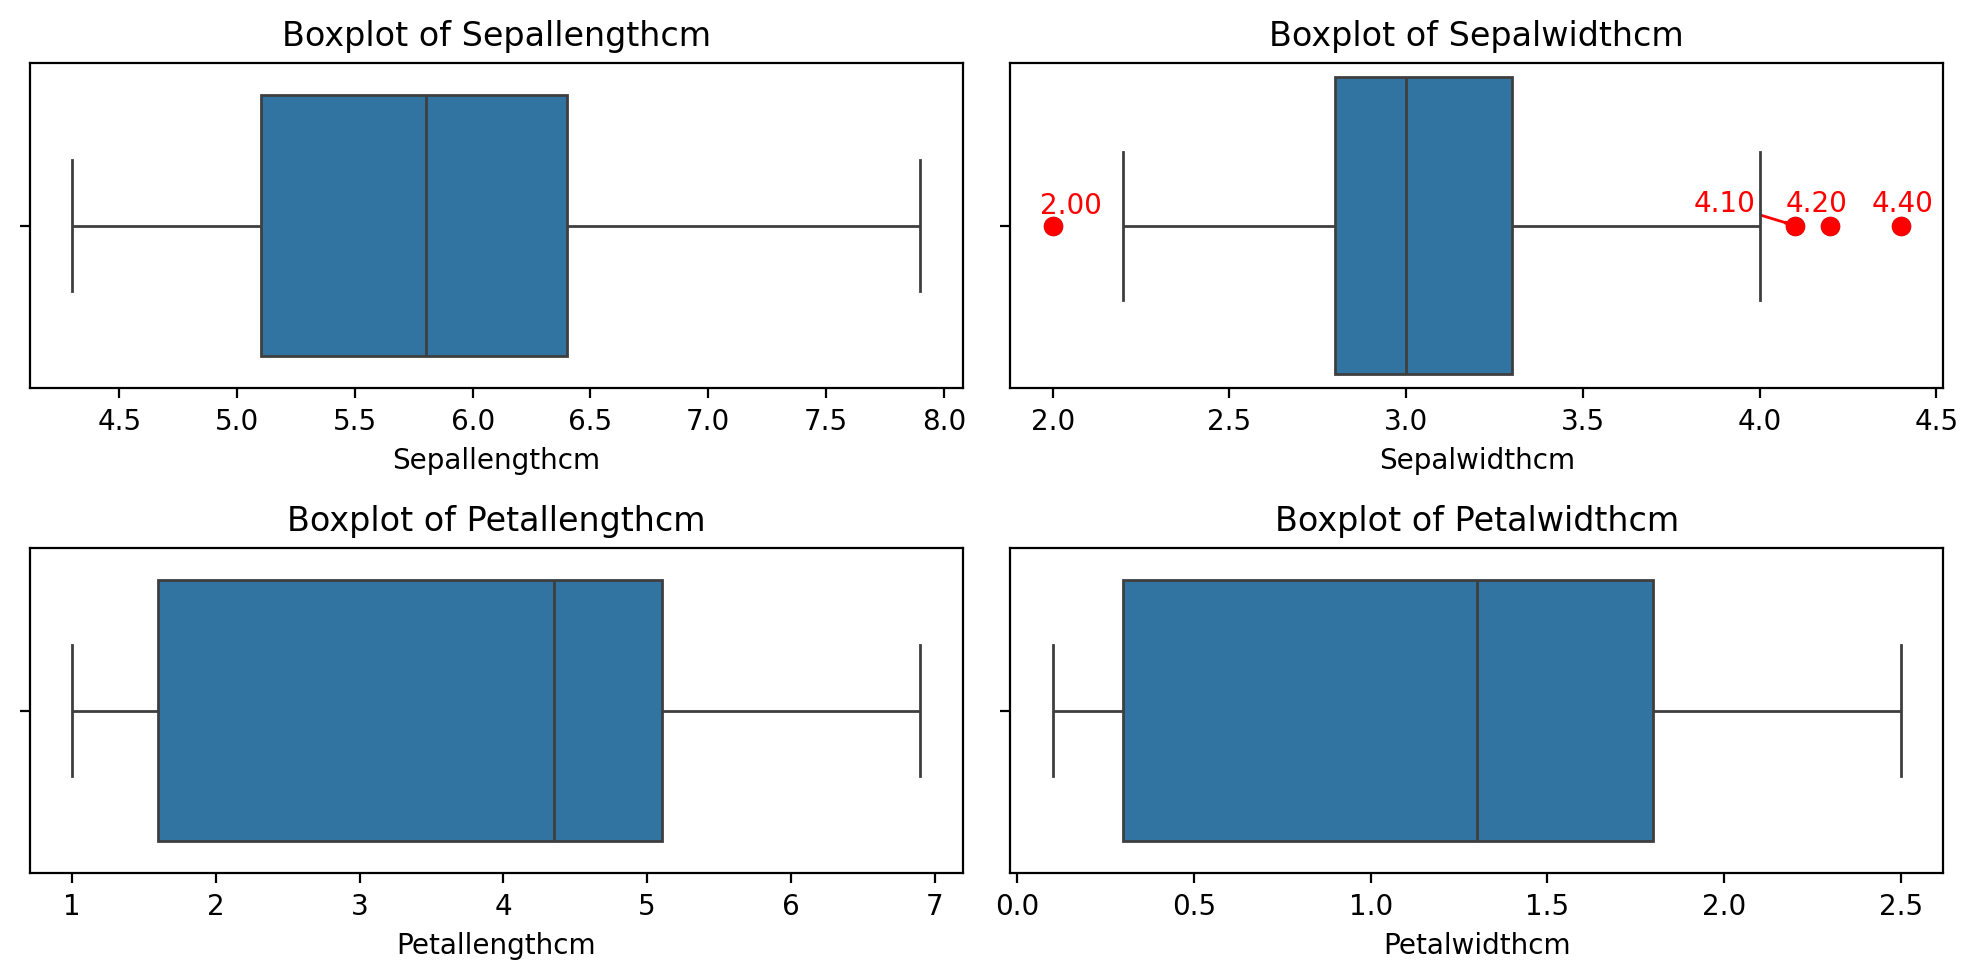

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(10, 5), dpi=200)
columns = df.columns[:-1]

for i, ax in enumerate(axes.flatten()):
    col = columns[i]
    median_val = df[col].median()
    q25 = df[col].quantile(0.25)
    q75 = df[col].quantile(0.75)
    iqr = q75 - q25
    lower_bound = q25 - 1.5 * iqr
    upper_bound = q75 + 1.5 * iqr

    sns.boxplot(x=df[col], ax=ax)

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

    if not outliers.empty:
        ax.scatter(outliers, [0] * len(outliers), color="red", zorder=10, label="Outliers")
        texts = [ax.text(value, 0, f"{value:.2f}", color="red", ha="center", va="bottom") for value in outliers]
        adjust_text(texts, ax=ax, arrowprops=dict(arrowstyle="->", color="red"))

    ax.set_title(f"Boxplot of {col.capitalize()}")
    ax.set_xlabel(col.capitalize())
    ax.set_ylabel("")

    if i >= len(columns):
        ax.axis("off")

plt.tight_layout()
plt.show()

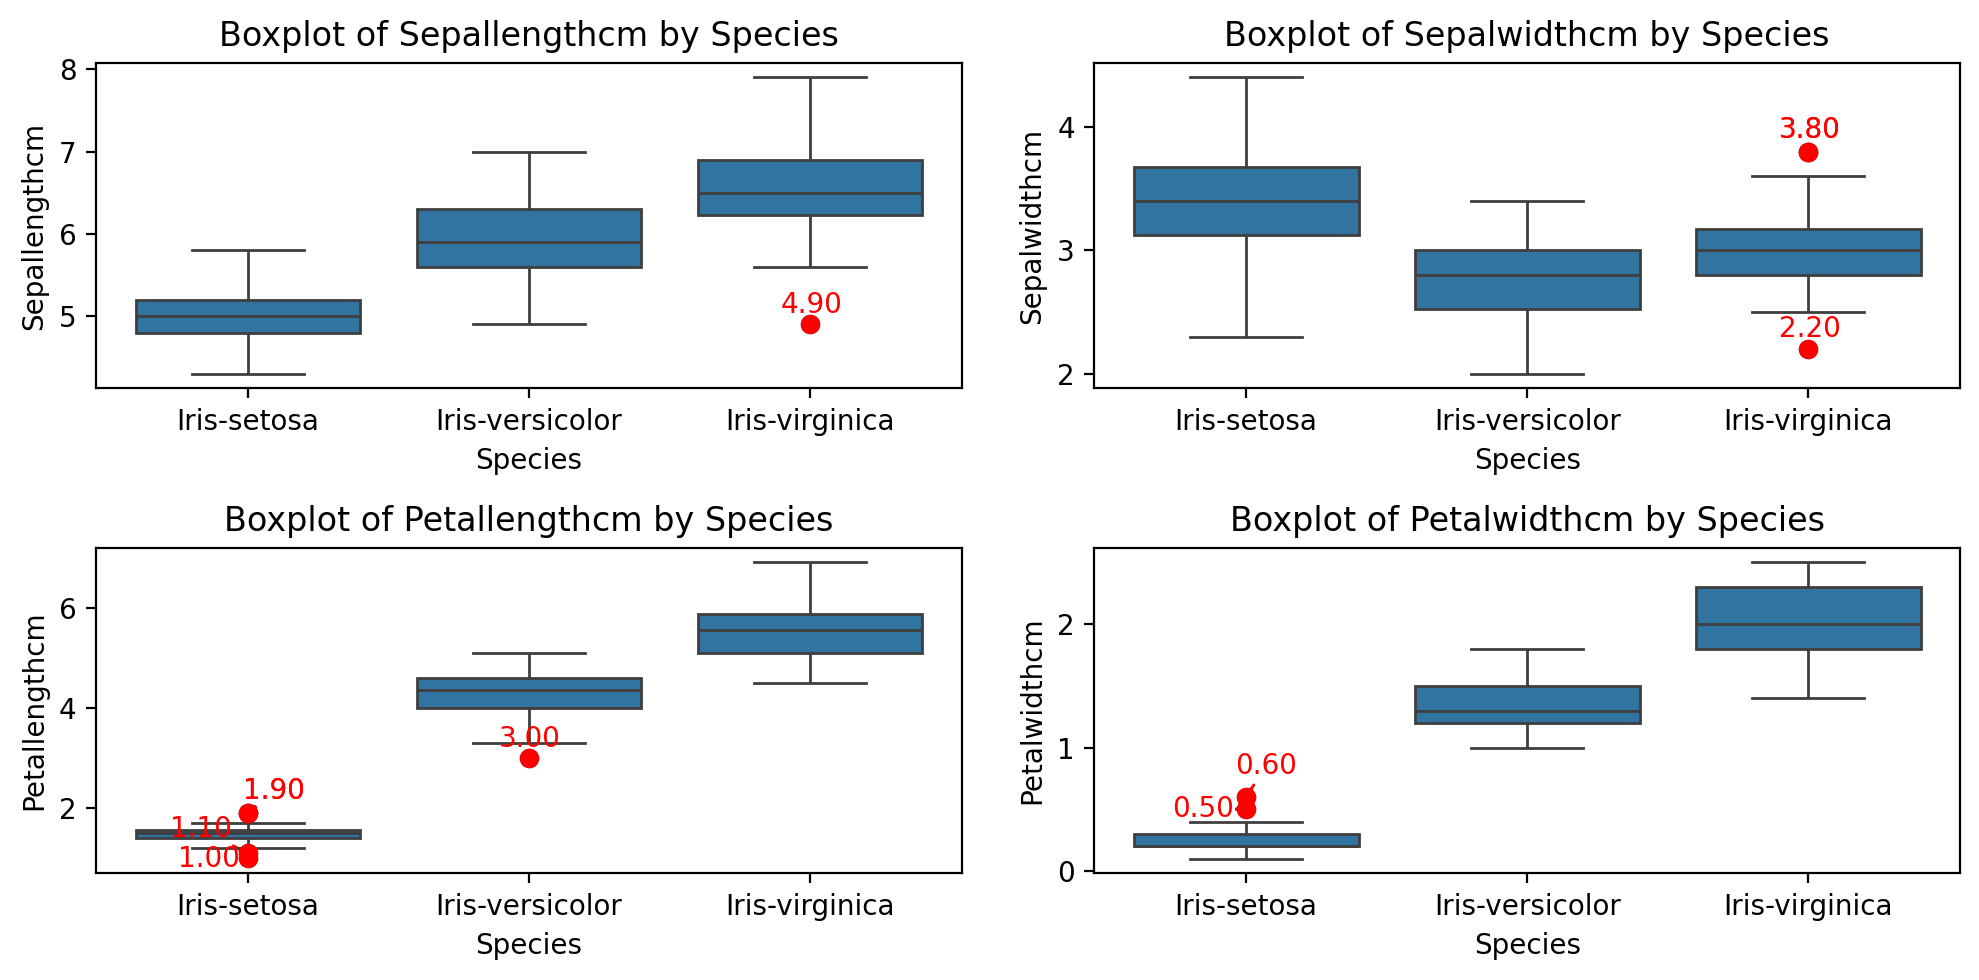

In [16]:
species_column = "Species"

fig, axes = plt.subplots(2, 2, figsize=(10, 5), dpi=200)
columns = df.columns[df.columns != species_column]

for i, ax in enumerate(axes.flatten()):
    if i < len(columns):
        col = columns[i]

        sns.boxplot(x=species_column, y=col, data=df, ax=ax)
        
        for species in df[species_column].unique():
            species_data = df[df[species_column] == species][col]
            q25 = species_data.quantile(0.25)
            q75 = species_data.quantile(0.75)
            iqr = q75 - q25
            lower_bound = q25 - 1.5 * iqr
            upper_bound = q75 + 1.5 * iqr

            outliers = species_data[(species_data < lower_bound) | (species_data > upper_bound)]
            
            if not outliers.empty:
                ax.scatter([species] * len(outliers), outliers, color="red", zorder=10, label="Outliers")

                texts = [ax.text(species, value, f"{value:.2f}", color="red", ha="center", va="bottom") for value in outliers]
                adjust_text(texts, ax=ax, arrowprops=dict(arrowstyle="->", color="red"))
        
        ax.set_title(f"Boxplot of {col.capitalize()} by {species_column.capitalize()}")
        ax.set_xlabel(species_column.capitalize())
        ax.set_ylabel(col.capitalize())

    else:
        ax.axis("off")

plt.tight_layout()
plt.show()